In [738]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt
import seaborn as sns
import random
import math

In [739]:
train=pd.read_csv("train.csv") #Load the data
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [740]:
test=pd.read_csv("test.csv")
test1=test[test.columns]
test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [741]:
train.shape

(1460, 81)

In [742]:
test.shape

(1459, 80)

In [743]:
train.drop('Id', axis=1,  inplace=True)#drop Id column as it isn't of use
test.drop('Id',axis=1,inplace=True)

In [744]:
for column in train:      #drop columns that have more than 30 NaN values
        if train[column].count() / len(train) <= 0.3:
            train.drop(column, axis=1, inplace=True)
train.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,12,2008,WD,Normal,250000


In [745]:
for column in test:      #drop columns that have more than 30% NaN values
        if test[column].count() / len(test) <= 0.3:
            test.drop(column, axis=1, inplace=True)
            print("Dropped feature ",column)
test.head()

Dropped feature  Alley
Dropped feature  PoolQC
Dropped feature  Fence
Dropped feature  MiscFeature


,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,20,RH,80.0,11622,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,120,0,0,6,2010,WD,Normal
1,20,RL,81.0,14267,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,36,0,0,0,0,12500,6,2010,WD,Normal
2,60,RL,74.0,13830,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,34,0,0,0,0,0,3,2010,WD,Normal
3,60,RL,78.0,9978,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,36,0,0,0,0,0,6,2010,WD,Normal
4,120,RL,43.0,5005,Pave,IR1,HLS,AllPub,Inside,Gtl,...,82,0,0,144,0,0,1,2010,WD,Normal


In [746]:
train.dtypes

MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
Street            object
LotShape          object
LandContour       object
Utilities         object
LotConfig         object
LandSlope         object
Neighborhood      object
Condition1        object
Condition2        object
BldgType          object
HouseStyle        object
OverallQual        int64
OverallCond        int64
YearBuilt          int64
YearRemodAdd       int64
RoofStyle         object
RoofMatl          object
Exterior1st       object
Exterior2nd       object
MasVnrType        object
MasVnrArea       float64
ExterQual         object
ExterCond         object
Foundation        object
BsmtQual          object
BsmtCond          object
                  ...   
BsmtHalfBath       int64
FullBath           int64
HalfBath           int64
BedroomAbvGr       int64
KitchenAbvGr       int64
KitchenQual       object
TotRmsAbvGrd       int64
Functional        object
Fireplaces         int64


In [747]:
cat_cols = train.select_dtypes(exclude=['int64', 'float64']).columns #find out quantitative columns
num_cols=train.select_dtypes(['int64','float64']).columns  #find out categorical columns
cat_cols

Index(['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'SaleType', 'SaleCondition'],
      dtype='object')

In [748]:
num_cols

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

In [749]:
train.isnull().sum()

MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
Street             0
LotShape           0
LandContour        0
Utilities          0
LotConfig          0
LandSlope          0
Neighborhood       0
Condition1         0
Condition2         0
BldgType           0
HouseStyle         0
OverallQual        0
OverallCond        0
YearBuilt          0
YearRemodAdd       0
RoofStyle          0
RoofMatl           0
Exterior1st        0
Exterior2nd        0
MasVnrType         8
MasVnrArea         8
ExterQual          0
ExterCond          0
Foundation         0
BsmtQual          37
BsmtCond          37
                ... 
BsmtHalfBath       0
FullBath           0
HalfBath           0
BedroomAbvGr       0
KitchenAbvGr       0
KitchenQual        0
TotRmsAbvGrd       0
Functional         0
Fireplaces         0
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageCars         0
GarageArea         0
GarageQual        81
GarageCond   

In [750]:
test.isnull().sum()

MSSubClass         0
MSZoning           4
LotFrontage      227
LotArea            0
Street             0
LotShape           0
LandContour        0
Utilities          2
LotConfig          0
LandSlope          0
Neighborhood       0
Condition1         0
Condition2         0
BldgType           0
HouseStyle         0
OverallQual        0
OverallCond        0
YearBuilt          0
YearRemodAdd       0
RoofStyle          0
RoofMatl           0
Exterior1st        1
Exterior2nd        1
MasVnrType        16
MasVnrArea        15
ExterQual          0
ExterCond          0
Foundation         0
BsmtQual          44
BsmtCond          45
                ... 
BsmtFullBath       2
BsmtHalfBath       2
FullBath           0
HalfBath           0
BedroomAbvGr       0
KitchenAbvGr       0
KitchenQual        1
TotRmsAbvGrd       0
Functional         2
Fireplaces         0
FireplaceQu      730
GarageType        76
GarageYrBlt       78
GarageFinish      78
GarageCars         1
GarageArea         1
GarageQual   

In [751]:
train.describe()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [752]:
for i in train.columns:
    if i in cat_cols:
        train[i]=train[i].fillna(train[i].mode()[0])#fill null values in cat_cols with mode
    else:
        train[i]=train[i].fillna(train[i].median())#fill null values in num_cols with median
train.isnull().sum()

MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
Street           0
LotShape         0
LandContour      0
Utilities        0
LotConfig        0
LandSlope        0
Neighborhood     0
Condition1       0
Condition2       0
BldgType         0
HouseStyle       0
OverallQual      0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
RoofStyle        0
RoofMatl         0
Exterior1st      0
Exterior2nd      0
MasVnrType       0
MasVnrArea       0
ExterQual        0
ExterCond        0
Foundation       0
BsmtQual         0
BsmtCond         0
                ..
BsmtHalfBath     0
FullBath         0
HalfBath         0
BedroomAbvGr     0
KitchenAbvGr     0
KitchenQual      0
TotRmsAbvGrd     0
Functional       0
Fireplaces       0
FireplaceQu      0
GarageType       0
GarageYrBlt      0
GarageFinish     0
GarageCars       0
GarageArea       0
GarageQual       0
GarageCond       0
PavedDrive       0
WoodDeckSF       0
OpenPorchSF      0
EnclosedPorch    0
3SsnPorch   

In [753]:
for i in test.columns:
    if i in cat_cols:
        test[i]=test[i].fillna(test[i].mode()[0])
    else:
        test[i]=test[i].fillna(test[i].median())
test.isnull().sum()

MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
Street           0
LotShape         0
LandContour      0
Utilities        0
LotConfig        0
LandSlope        0
Neighborhood     0
Condition1       0
Condition2       0
BldgType         0
HouseStyle       0
OverallQual      0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
RoofStyle        0
RoofMatl         0
Exterior1st      0
Exterior2nd      0
MasVnrType       0
MasVnrArea       0
ExterQual        0
ExterCond        0
Foundation       0
BsmtQual         0
BsmtCond         0
                ..
BsmtFullBath     0
BsmtHalfBath     0
FullBath         0
HalfBath         0
BedroomAbvGr     0
KitchenAbvGr     0
KitchenQual      0
TotRmsAbvGrd     0
Functional       0
Fireplaces       0
FireplaceQu      0
GarageType       0
GarageYrBlt      0
GarageFinish     0
GarageCars       0
GarageArea       0
GarageQual       0
GarageCond       0
PavedDrive       0
WoodDeckSF       0
OpenPorchSF      0
EnclosedPorc

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f4d96212278>,
      dtype=object)

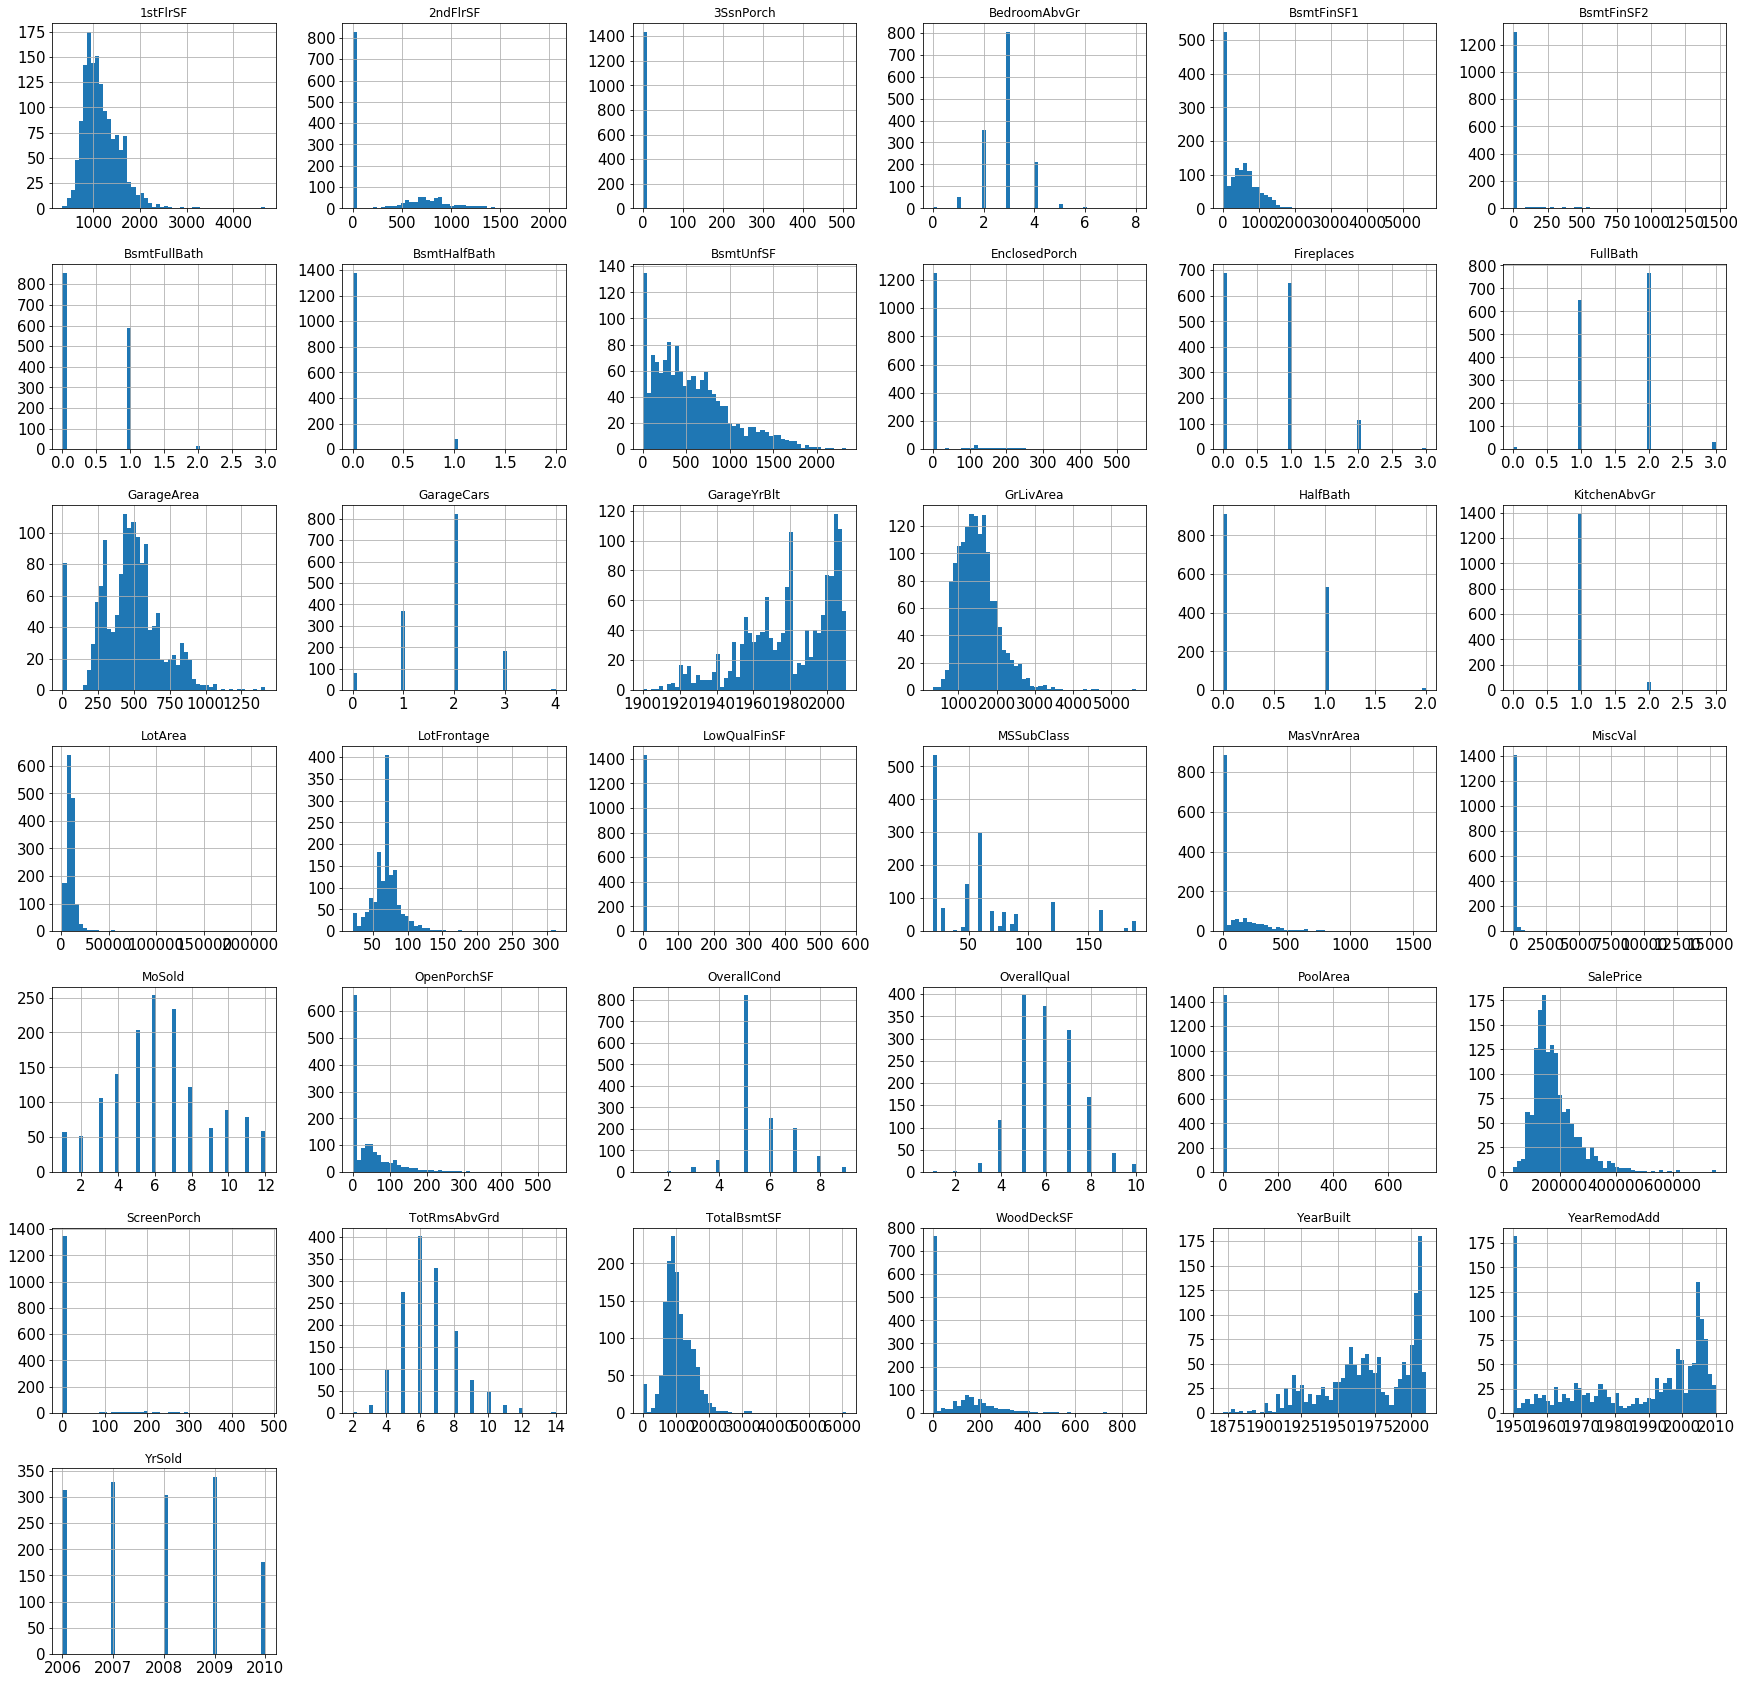

In [754]:
#EDA on train_set
train.hist(figsize=(30,30),xlabelsize=15,ylabelsize=15,bins=50)

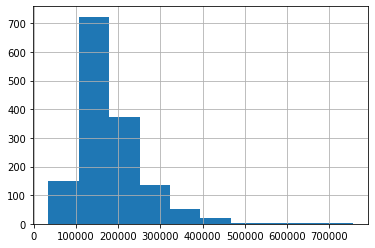

In [755]:
train.SalePrice.hist()  #plotting the response variable we find it doesn't follow an exact normal distrbution

In [756]:
#hypothesized features related to SalePrice are: MSSubClass,MSZoning,Utilities,OverallCond,OverallQual,YearBuilt,YrSold,YearRemodAdd,MiscVal,RoofMatl,Exterior1st,Exterior2nd,LotArea,Neighborhood,HouseStyle,Foundation,Heating,CentralAir,TotalBsmtSF,Electrical,1stFlrSF,2ndFlrSF,FullBath,Bedroom,Kitchen,TotRmsAbvGrd,GrLivArea,Fireplaces,BsmtFullBath,GarageArea,GarageCars,PavedDrive,PoolArea,SaleType
L=['MSSubClass','MSZoning','Utilities','OverallCond','OverallQual','YearBuilt','YrSold','YearRemodAdd','MiscVal','RoofMatl','Exterior1st','Exterior2nd','LotArea','Neighborhood','HouseStyle','Foundation','Heating','CentralAir','TotalBsmtSF','Electrical','1stFlrSF','2ndFlrSF','FullBath','BedroomAbvGr','KitchenAbvGr','TotRmsAbvGrd','GrLivArea','Fireplaces','BsmtFullBath','GarageArea','GarageCars','PavedDrive','PoolArea','SaleType','SalePrice']

In [757]:
corrsp=train.corr()['SalePrice'][:-1] 
features_list = corrsp.sort_values(ascending=False)
features_list

OverallQual      0.790982
GrLivArea        0.708624
GarageCars       0.640409
GarageArea       0.623431
TotalBsmtSF      0.613581
1stFlrSF         0.605852
FullBath         0.560664
TotRmsAbvGrd     0.533723
YearBuilt        0.522897
YearRemodAdd     0.507101
MasVnrArea       0.472614
Fireplaces       0.466929
GarageYrBlt      0.466754
BsmtFinSF1       0.386420
LotFrontage      0.334771
WoodDeckSF       0.324413
2ndFlrSF         0.319334
OpenPorchSF      0.315856
HalfBath         0.284108
LotArea          0.263843
BsmtFullBath     0.227122
BsmtUnfSF        0.214479
BedroomAbvGr     0.168213
ScreenPorch      0.111447
PoolArea         0.092404
MoSold           0.046432
3SsnPorch        0.044584
BsmtFinSF2      -0.011378
BsmtHalfBath    -0.016844
MiscVal         -0.021190
LowQualFinSF    -0.025606
YrSold          -0.028923
OverallCond     -0.077856
MSSubClass      -0.084284
EnclosedPorch   -0.128578
KitchenAbvGr    -0.135907
Name: SalePrice, dtype: float64

### Detecting and correcting outliers in top 12 most important features

Text(0.5, 1.0, 'Fireplaces')

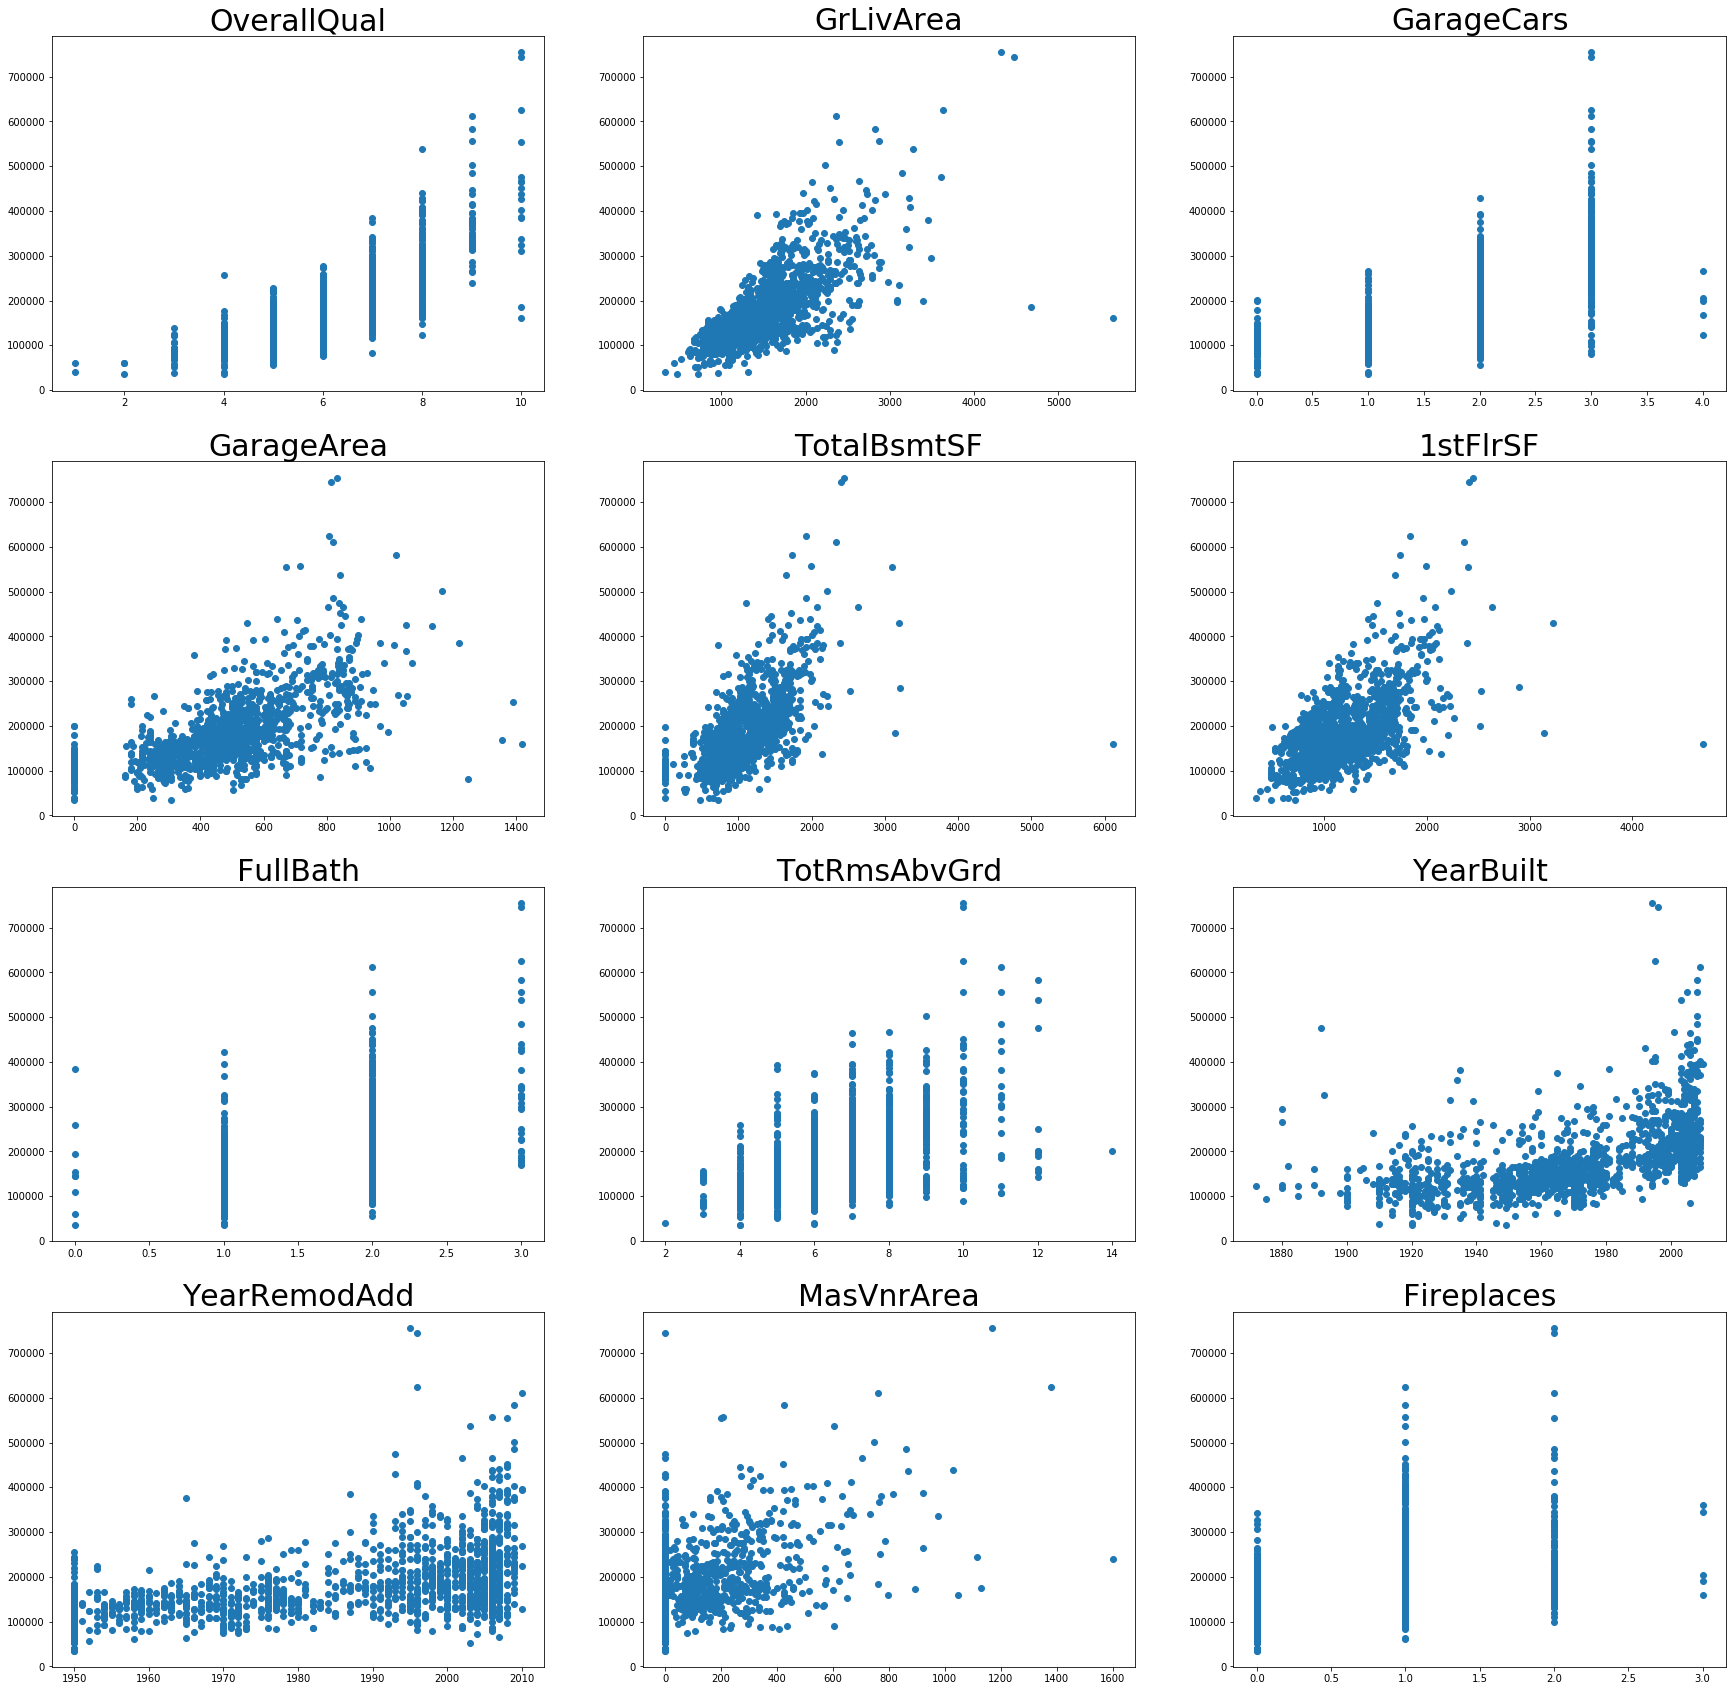

In [758]:
fig, axs = plt.subplots(4, 3,figsize=(30,30)) #identifying outliers
axs[0,0].scatter(train['OverallQual'],train['SalePrice'])
axs[0, 0].set_title('OverallQual',fontsize=30)
axs[0,1].scatter(train['GrLivArea'],train['SalePrice'])
axs[0, 1].set_title('GrLivArea',fontsize=30)
axs[0,2].scatter(train['GarageCars'],train['SalePrice'])
axs[0,2].set_title('GarageCars',fontsize=30)
axs[1,0].scatter(train['GarageArea'],train['SalePrice'])
axs[1,0].set_title('GarageArea',fontsize=30)
axs[1,1].scatter(train['TotalBsmtSF'],train['SalePrice'])
axs[1,1].set_title('TotalBsmtSF',fontsize=30)
axs[1,2].scatter(train['1stFlrSF'],train['SalePrice'])
axs[1,2].set_title('1stFlrSF',fontsize=30)
axs[2,0].scatter(train['FullBath'],train['SalePrice'])
axs[2,0].set_title('FullBath',fontsize=30)
axs[2,1].scatter(train['TotRmsAbvGrd'],train['SalePrice'])
axs[2,1].set_title('TotRmsAbvGrd',fontsize=30)
axs[2,2].scatter(train['YearBuilt'],train['SalePrice'])
axs[2,2].set_title('YearBuilt',fontsize=30)
axs[3,0].scatter(train['YearRemodAdd'],train['SalePrice'])
axs[3,0].set_title('YearRemodAdd',fontsize=30)
axs[3,1].scatter(train['MasVnrArea'],train['SalePrice'])
axs[3,1].set_title('MasVnrArea',fontsize=30)
axs[3,2].scatter(train['Fireplaces'],train['SalePrice'])
axs[3,2].set_title('Fireplaces',fontsize=30)

In [759]:
#dealing with outliers
train.loc[train['YearBuilt'] < 1900 , 'YearBuilt'] = train.loc[train['YearBuilt']<1900]['YearBuilt']=1900
train.loc[train['GrLivArea'] >3000, 'GrLivArea'] = train.loc[train['GrLivArea']>3000]['GrLivArea']=3000
train.loc[train['1stFlrSF'] >2500, '1stFlrSF'] = train.loc[train['1stFlrSF']>2500]['1stFlrSF']=2500
train.loc[train['TotalBsmtSF'] >2500, 'TotalBsmtSF'] = train.loc[train['TotalBsmtSF']>2500]['TotalBsmtSF']=2500
train.loc[train['GarageArea'] >1000, 'GarageArea'] = train.loc[train['GarageArea']>1000]['GarageArea']=1000
train.loc[train['MasVnrArea'] >800, 'MasVnrArea'] = train.loc[train['MasVnrArea']>800]['MasVnrArea']=800

Text(0.5, 1.0, 'Fireplaces')

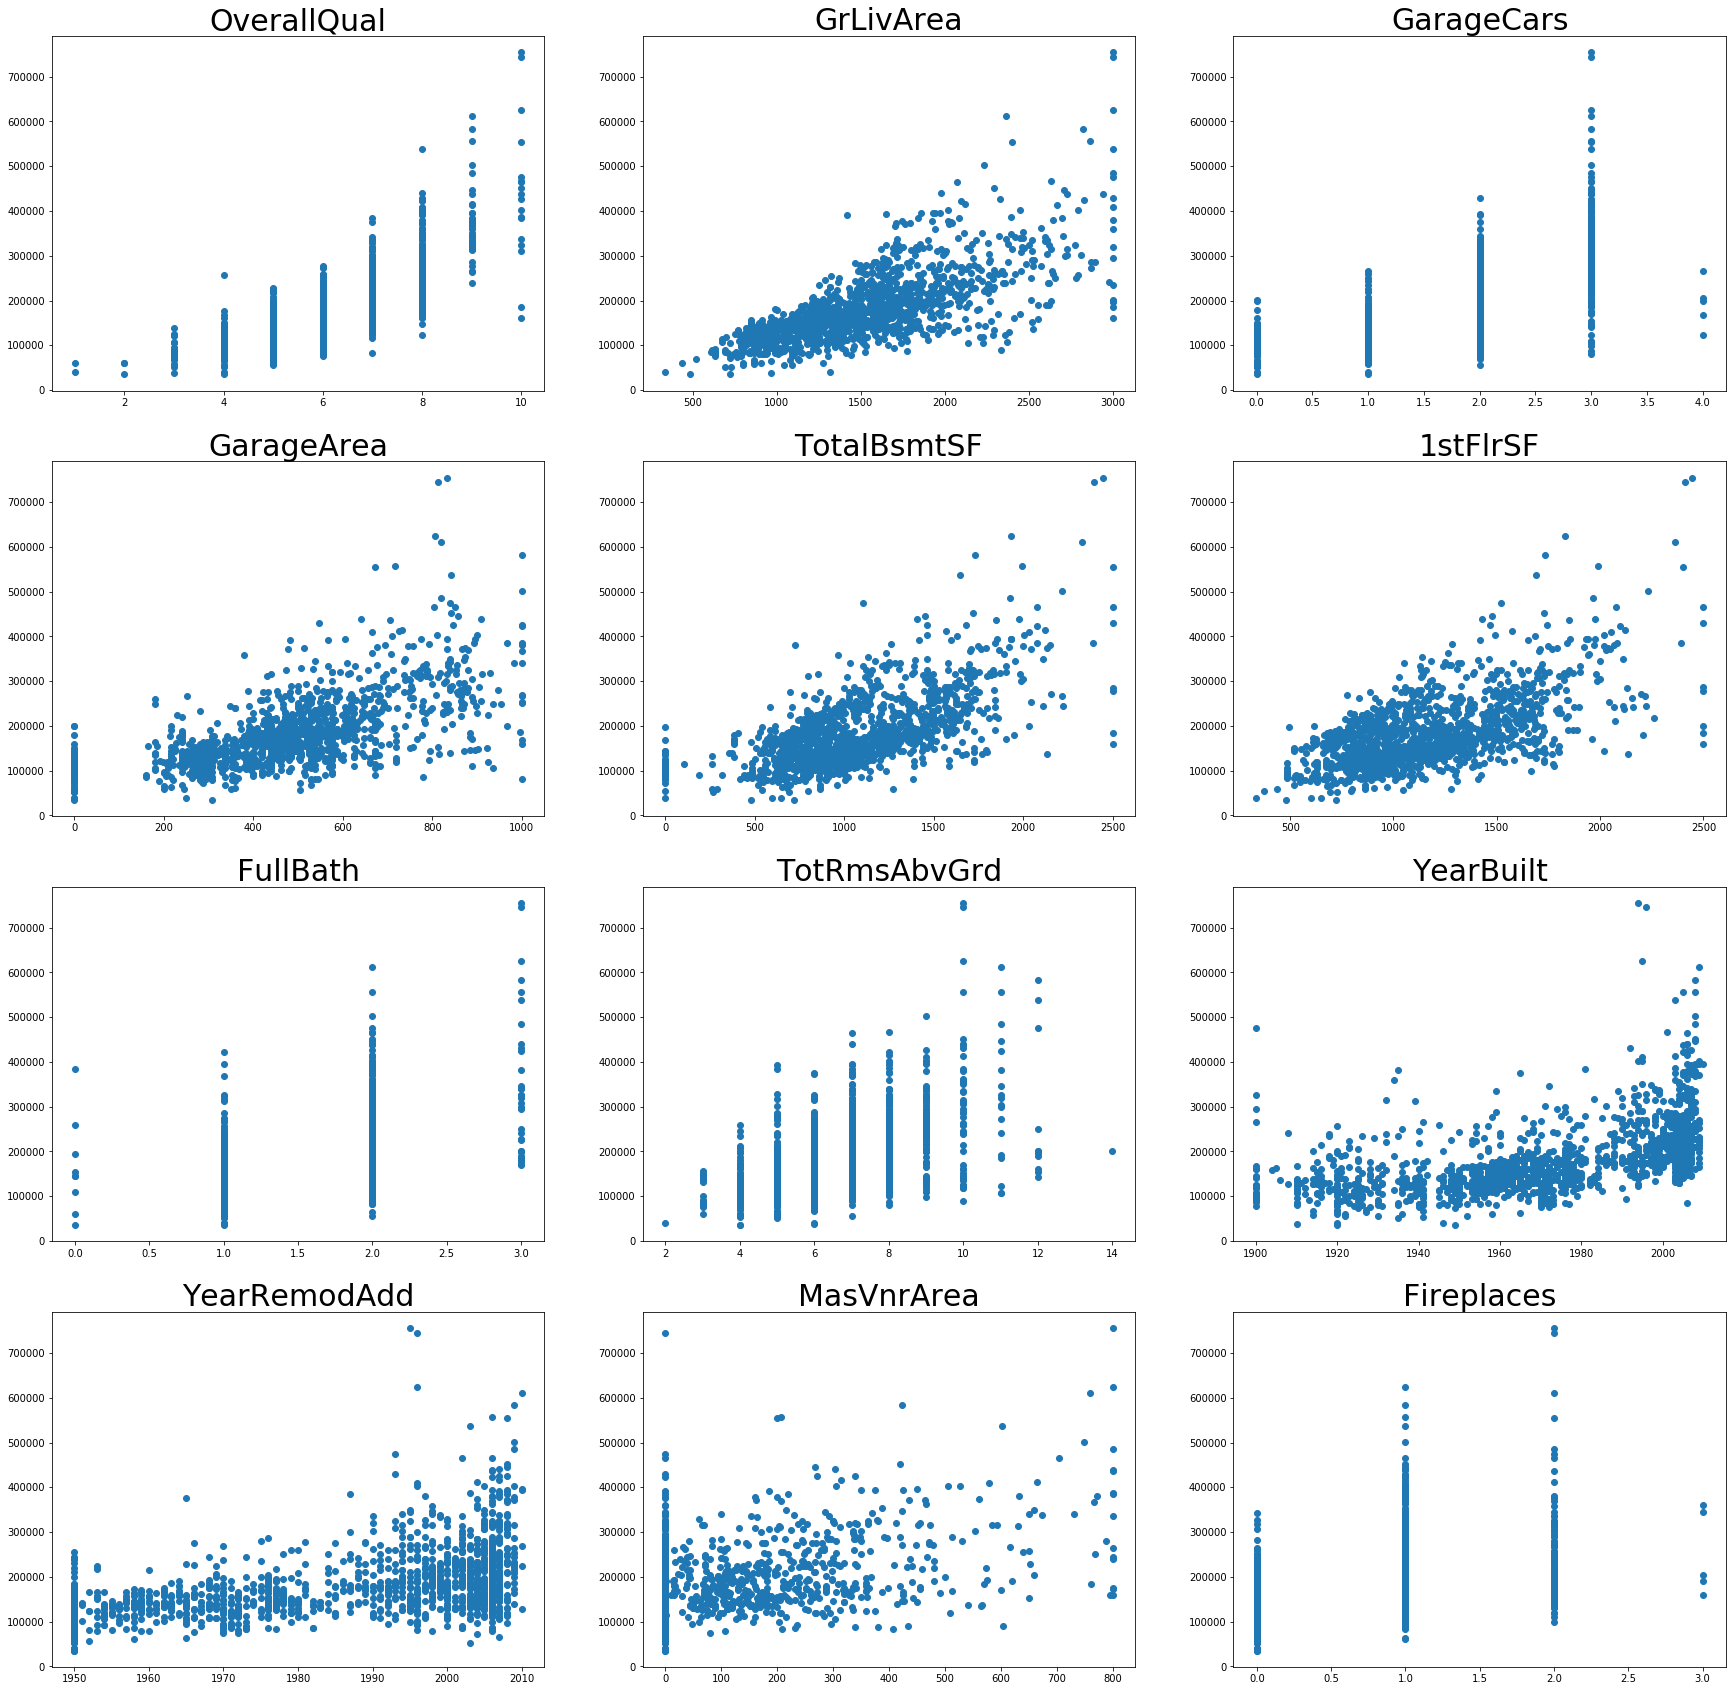

In [761]:
fig, axs = plt.subplots(4, 3,figsize=(30,30))
axs[0,0].scatter(train['OverallQual'],train['SalePrice'])
axs[0, 0].set_title('OverallQual',fontsize=30)
axs[0,1].scatter(train['GrLivArea'],train['SalePrice'])
axs[0, 1].set_title('GrLivArea',fontsize=30)
axs[0,2].scatter(train['GarageCars'],train['SalePrice'])
axs[0,2].set_title('GarageCars',fontsize=30)
axs[1,0].scatter(train['GarageArea'],train['SalePrice'])
axs[1,0].set_title('GarageArea',fontsize=30)
axs[1,1].scatter(train['TotalBsmtSF'],train['SalePrice'])
axs[1,1].set_title('TotalBsmtSF',fontsize=30)
axs[1,2].scatter(train['1stFlrSF'],train['SalePrice'])
axs[1,2].set_title('1stFlrSF',fontsize=30)
axs[2,0].scatter(train['FullBath'],train['SalePrice'])
axs[2,0].set_title('FullBath',fontsize=30)
axs[2,1].scatter(train['TotRmsAbvGrd'],train['SalePrice'])
axs[2,1].set_title('TotRmsAbvGrd',fontsize=30)
axs[2,2].scatter(train['YearBuilt'],train['SalePrice'])
axs[2,2].set_title('YearBuilt',fontsize=30)
axs[3,0].scatter(train['YearRemodAdd'],train['SalePrice'])
axs[3,0].set_title('YearRemodAdd',fontsize=30)
axs[3,1].scatter(train['MasVnrArea'],train['SalePrice'])
axs[3,1].set_title('MasVnrArea',fontsize=30)
axs[3,2].scatter(train['Fireplaces'],train['SalePrice'])
axs[3,2].set_title('Fireplaces',fontsize=30)

### 

In [762]:
from sklearn.preprocessing import LabelEncoder #LabelEncoding the categorical variables
for c in cat_cols:
    train[c] = LabelEncoder().fit_transform(train[c])
train.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,3,65.0,8450,1,3,3,0,4,0,...,0,0,0,0,0,2,2008,8,4,208500
1,20,3,80.0,9600,1,3,3,0,2,0,...,0,0,0,0,0,5,2007,8,4,181500
2,60,3,68.0,11250,1,0,3,0,4,0,...,0,0,0,0,0,9,2008,8,4,223500
3,70,3,60.0,9550,1,0,3,0,0,0,...,272,0,0,0,0,2,2006,8,0,140000
4,60,3,84.0,14260,1,0,3,0,2,0,...,0,0,0,0,0,12,2008,8,4,250000


In [763]:
for c in cat_cols:
    test[c] = LabelEncoder().fit_transform(test[c])
test.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,20,2,80.0,11622,1,3,3,0,4,0,...,0,0,0,120,0,0,6,2010,8,4
1,20,3,81.0,14267,1,0,3,0,0,0,...,36,0,0,0,0,12500,6,2010,8,4
2,60,3,74.0,13830,1,0,3,0,4,0,...,34,0,0,0,0,0,3,2010,8,4
3,60,3,78.0,9978,1,0,3,0,4,0,...,36,0,0,0,0,0,6,2010,8,4
4,120,3,43.0,5005,1,0,1,0,4,0,...,82,0,0,144,0,0,1,2010,8,4


In [764]:
train['SalePrice']=np.log1p(train["SalePrice"]) #normalizing the dependent variable as it is slightly skewed

In [765]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
y=train['SalePrice']
train=train.drop('SalePrice', axis=1)
train_data = StandardScaler().fit_transform(train)
test_data= StandardScaler().fit_transform(test)
X=pd.DataFrame(data=train_data,columns=train.columns)
X_train,X_cv,y_train,y_cv=train_test_split(X,y,test_size=0.2,random_state=3)
X_test=pd.DataFrame(data=test_data,columns=test.columns)

/home/susiejojo/.local/lib/python3.6/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/home/susiejojo/.local/lib/python3.6/site-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/home/susiejojo/.local/lib/python3.6/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/home/susiejojo/.local/lib/python3.6/site-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [766]:
X_train.shape,y_train.shape,X_cv.shape,y_cv.shape,X_test.shape

((1168, 75), (1168,), (292, 75), (292,), (1459, 75))

In [767]:
from sklearn.linear_model import LinearRegression
LR=LinearRegression(normalize=True)
LR.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=True)

In [768]:
y_hat=LR.predict(X_test)
y_hat1=LR.predict(X_cv)

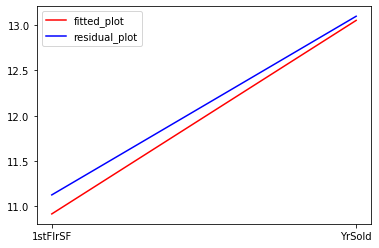

In [769]:
plt.plot([min(X_cv), max(X_cv)], [min(y_cv), max(y_cv)], color='red',label='fitted_plot')
plt.plot([min(X_cv), max(X_cv)], [min(y_hat1), max(y_hat1)], color='blue',label='residual_plot')
plt.legend()

In [770]:
from sklearn.metrics import r2_score
r2_score(y_hat1,y_cv)

0.9058818416943939

In [771]:
from sklearn.ensemble import RandomForestRegressor
rf_regr = RandomForestRegressor(max_depth=10, random_state=0, n_estimators=100)
rf_regr.fit(X_train, y_train)
rf_pred = rf_regr.predict(X_test)
rf_regr.score (X_train, y_train)

0.9765857355913081

In [772]:
from sklearn.metrics import mean_squared_error
ms=mean_squared_error(y_cv,y_hat1)
print ("RMSE on cross validation set:",math.sqrt(ms))

RMSE on cross validation set: 0.11075141056428908
